# **Rice Image Classifiction**
In this project we will build models to accurately recognise an image of a plant and predict if it is healthy, powdery or rust. We will use deep learning techniques such as ANNs, CNNs, Transfer Learning, Tensorflow pipelines etc to achieve the highest accuracy possible.

In [46]:
# import essential libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pathlib
import random
import pydot
import graphviz
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [2]:
train_data_location = "/kaggle/input/plant-disease-recognition-dataset/Train/Train"
label_list = os.listdir(train_data_location)

image_dict = {} #dict to store images with labels
count_dict = {} #dict to store count of each label
for name in label_list:
    file_path = glob.glob(f'/kaggle/input/plant-disease-recognition-dataset/Train/Train/{name}/*')
    count = len(file_path)
    image_path = random.choice(file_path)
    image_dict[name] = tf.keras.utils.load_img(image_path)
    count_dict[name] = count

In [3]:
image_dict

{'Healthy': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4000x2672>,
 'Rust': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2592x1728>,
 'Powdery': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4000x2672>}

# Exploratory Data Analysis

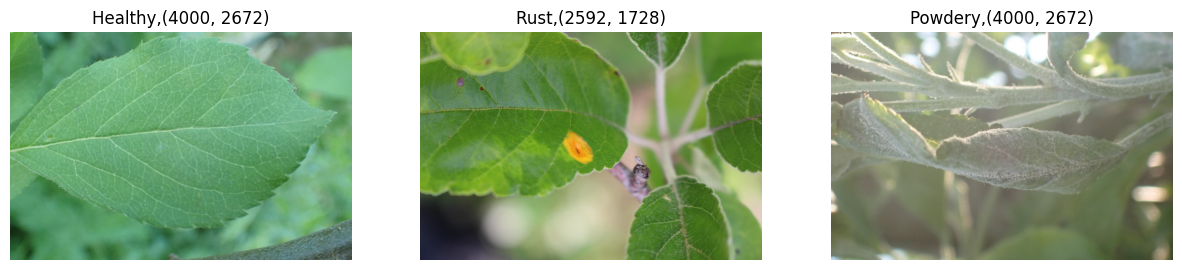

In [4]:
# plot each sample per class with its size
plt.figure(figsize=(15,12))
for i,(name,image) in enumerate(image_dict.items()):
    plt.subplot(1,3,i+1)
    plt.imshow(image)
    plt.title(f'{name},{image.size}')
    plt.axis('off')

In [5]:
label_count_df = pd.DataFrame({
    'class':count_dict.keys(),
    'count':count_dict.values()
})
print('Training samples per class: ')
label_count_df

Training samples per class: 


,class,count
0,Healthy,458
1,Rust,434
2,Powdery,430


<Axes: xlabel='class'>

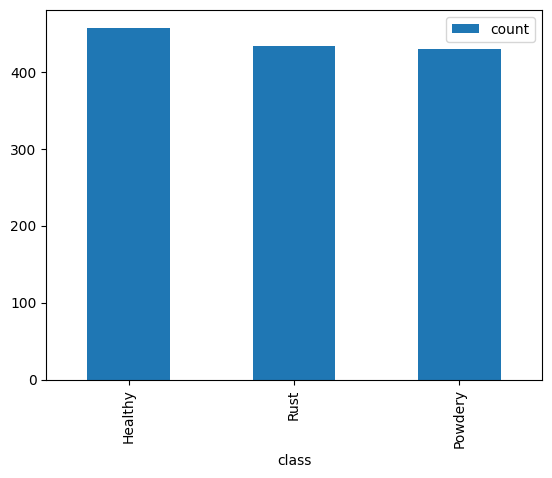

In [6]:
label_count_df.plot.bar(x='class',y='count')

# Load the Datasets


In [7]:
# load the dataset into the notebook
train_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/plant-disease-recognition-dataset/Train/Train',shuffle=True)
test_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/plant-disease-recognition-dataset/Test/Test',shuffle=False)
val_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/plant-disease-recognition-dataset/Validation/Validation',shuffle=False)

Found 1322 files belonging to 3 classes.
Found 150 files belonging to 3 classes.
Found 60 files belonging to 3 classes.


2023-12-11 16:30:33.573492: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-11 16:30:33.573596: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-11 16:30:33.573694: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-11 16:30:33.573795: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-11 16:30:33.573886: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-11 16:30:33.574081: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-11 16:30:33.574177: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

# Data Preprocessing

In [36]:
# preprocess the data by resizing and rescaling it
height,width = 224,224

data_preprocess = keras.Sequential([
    keras.layers.Resizing(height,width),
    keras.layers.Rescaling(1.0/255.0)
])
# perform the preprocessing on the train test and val set
train_ds = train_data.map(lambda x,y:(data_preprocess(x),y))
test_ds = test_data.map(lambda x,y:(data_preprocess(x),y))
val_ds = val_data.map(lambda x,y:(data_preprocess(x),y))

# ANN
Training on a simple 4 layered neural network

In [9]:
# build the model
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(height,width,3)),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(3,activation='softmax')
])
# model summary
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 1024)              154141696 
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 154404867 (589.01 MB)
Trainable params: 154404867 (589.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# plot the model
tf.keras.utils.plot_model(ann_model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
# compile the model
ann_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
# train the model
ann_history = ann_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
42/42 [==============================] - 35s 779ms/step - loss: 47.3187 - accuracy: 0.4327 - val_loss: 4.9710 - val_accuracy: 0.4167
Epoch 2/10
42/42 [==============================] - 34s 782ms/step - loss: 5.0067 - accuracy: 0.6029 - val_loss: 4.2466 - val_accuracy: 0.5500
Epoch 3/10
42/42 [==============================] - 34s 781ms/step - loss: 2.1970 - accuracy: 0.6687 - val_loss: 2.3097 - val_accuracy: 0.5500
Epoch 4/10
42/42 [==============================] - 34s 776ms/step - loss: 1.8151 - accuracy: 0.6596 - val_loss: 6.2851 - val_accuracy: 0.3833
Epoch 5/10
42/42 [==============================] - 34s 786ms/step - loss: 2.3396 - accuracy: 0.6589 - val_loss: 7.8174 - val_accuracy: 0.4167
Epoch 6/10
42/42 [==============================] - 33s 772ms/step - loss: 2.3064 - accuracy: 0.6641 - val_loss: 2.2874 - val_accuracy: 0.5667
Epoch 7/10
42/42 [==============================] - 34s 775ms/step - loss: 0.7594 - accuracy: 0.7761 - val_loss: 2.1118 - val_accuracy: 0.516

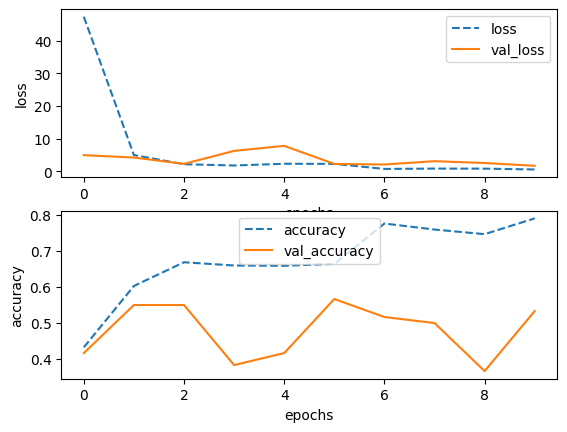

In [12]:
# function to plot loss vs val loss and accuracy vs val accuracy
def plot_metrics(history):
    plt.subplot(2,1,1)

    plt.plot(history.history["loss"],ls='dashed')
    plt.plot(history.history["val_loss"])
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['loss',"val_loss"])
    plt.subplot(2,1,2)

    plt.plot(history.history["accuracy"],ls='dashed')
    plt.plot(history.history["val_accuracy"])
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(['accuracy',"val_accuracy"])
    
plot_metrics(ann_history)


In [13]:
# test the model and print test loss and test accuracy
ann_test = ann_model.evaluate(test_ds)
ann_accuracy = ann_test[1]*100
print("Test Accuracy: ",ann_accuracy,"%")
print("Test Loss: ",ann_test[0])

5/5 [==============================] - 1s 55ms/step - loss: 1.4700 - accuracy: 0.5200
Test Accuracy:  51.99999809265137 %
Test Loss:  1.4699828624725342


# CNN
Training on a CNN

In [51]:
# build the model
cnn__model = keras.Sequential([
    #cnn layer
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu',input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu',input_shape=(height,width,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu',input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu',input_shape=(height,width,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.3),
    # dense layer
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(5,activation='softmax')
    
])
# model summary
cnn__model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_23 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_12 (Ba  (None, 224, 224, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 112, 112, 64)      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 112, 112, 32)    

In [52]:
# compile the model
cnn__model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
# train the model
cnn_history = cnn__model.fit(train_ds,validation_data=val_ds,epochs=5)

Epoch 1/5
42/42 [==============================] - 93s 2s/step - loss: 13.6465 - accuracy: 0.6982 - val_loss: 21.7452 - val_accuracy: 0.3500
Epoch 2/5
42/42 [==============================] - 92s 2s/step - loss: 3.0063 - accuracy: 0.8313 - val_loss: 89.2763 - val_accuracy: 0.3333
Epoch 3/5
42/42 [==============================] - 91s 2s/step - loss: 0.6697 - accuracy: 0.9266 - val_loss: 107.5548 - val_accuracy: 0.3333
Epoch 4/5
42/42 [==============================] - 91s 2s/step - loss: 0.5904 - accuracy: 0.9523 - val_loss: 115.5850 - val_accuracy: 0.3333
Epoch 5/5
42/42 [==============================] - 91s 2s/step - loss: 0.5569 - accuracy: 0.9395 - val_loss: 76.5048 - val_accuracy: 0.3833


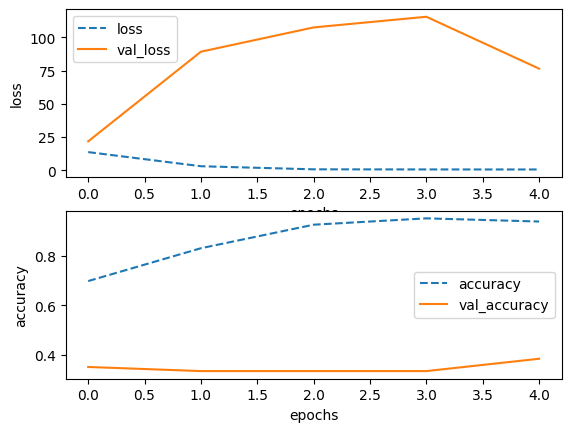

In [53]:
# plot loss vs val loss and accuracy vs test accuracy
plot_metrics(cnn_history)

In [55]:
# test the model and print test loss and accuracy
cnn_test = cnn__model.evaluate(test_ds)
cnn_accuracy = cnn_test[1]*100
print("Test Accuracy: ",cnn_accuracy,"%")
print("Test Loss: ",cnn_test[0])

5/5 [==============================] - 2s 322ms/step - loss: 69.0637 - accuracy: 0.4200
Test Accuracy:  41.999998688697815 %
Test Loss:  69.06371307373047


# MobilenetV2

In [18]:
# preprocess data for the mobilenet model
height,width = 128,128

data_preprocess_new = keras.Sequential([
    keras.layers.Resizing(height,width),
    keras.layers.Rescaling(1.0/255.0),
    keras.layers.Reshape((height,width,3))
])
# perform the data preprocessing on train test and val set
train_ds_new = train_data.map(lambda x,y:(data_preprocess_new(x),y))
test_ds_new = test_data.map(lambda x,y:(data_preprocess_new(x),y))
val_ds_new = val_data.map(lambda x,y:(data_preprocess_new(x),y))

In [19]:
# import the pre-trained mobilenet v2 model
pretrained_model_location = "/kaggle/input/mobilenet-v2/tensorflow2/035-128-classification/2"
base_model = hub.KerasLayer(pretrained_model_location,input_shape=(128,128,3),trainable=False)

In [20]:
# change the output layer of the mobilenet model according to this problems needs
mobilenet_model = keras.Sequential([
    base_model,
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3,activation='softmax')
])

mobilenet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dropout_1 (Dropout)         (None, 1001)              0         
                                                                 
 dense_5 (Dense)             (None, 3)                 3006      
                                                                 
Total params: 1695495 (6.47 MB)
Trainable params: 3006 (11.74 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


In [21]:
# compile the model
mobilenet_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
# train the model
mobilenet_model_history = mobilenet_model.fit(train_ds_new,validation_data=val_ds_new,epochs=10)

Epoch 1/10
42/42 [==============================] - 8s 104ms/step - loss: 0.5634 - accuracy: 0.7814 - val_loss: 0.1602 - val_accuracy: 0.9333
Epoch 2/10
42/42 [==============================] - 4s 86ms/step - loss: 0.1597 - accuracy: 0.9387 - val_loss: 0.1246 - val_accuracy: 0.9167
Epoch 3/10
42/42 [==============================] - 4s 81ms/step - loss: 0.1244 - accuracy: 0.9508 - val_loss: 0.1205 - val_accuracy: 0.9500
Epoch 4/10
42/42 [==============================] - 4s 81ms/step - loss: 0.0843 - accuracy: 0.9697 - val_loss: 0.0872 - val_accuracy: 0.9667
Epoch 5/10
42/42 [==============================] - 4s 76ms/step - loss: 0.0740 - accuracy: 0.9735 - val_loss: 0.0846 - val_accuracy: 0.9667
Epoch 6/10
42/42 [==============================] - 4s 82ms/step - loss: 0.0698 - accuracy: 0.9743 - val_loss: 0.0895 - val_accuracy: 0.9667
Epoch 7/10
42/42 [==============================] - 4s 81ms/step - loss: 0.0579 - accuracy: 0.9818 - val_loss: 0.0925 - val_accuracy: 0.9667
Epoch 8/10
4

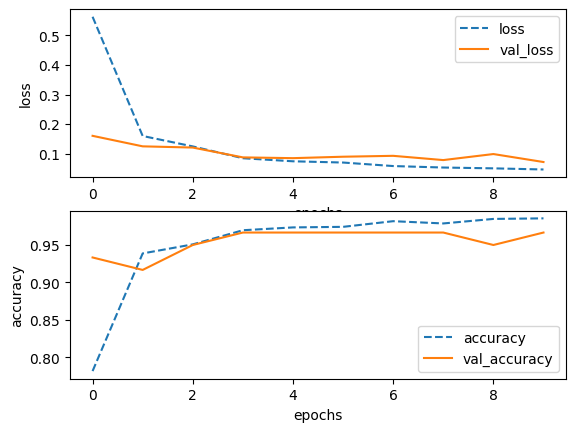

In [22]:
plot_metrics(mobilenet_model_history)

In [23]:
# test the model and print test loss and accuracy
mobilenet_test = mobilenet_model.evaluate(test_ds_new)
mobilenet_accuracy = mobilenet_test[1]*100
print("Test Accuracy: ",mobilenet_accuracy,"%")
print("Test Loss: ",mobilenet_test[0])

5/5 [==============================] - 1s 62ms/step - loss: 0.1938 - accuracy: 0.9400
Test Accuracy:  93.99999976158142 %
Test Loss:  0.1938062608242035


# EfficientnetV2

In [24]:
# import the pre-trained efficientnetv2 model
pretrained_model_loc = "/kaggle/input/efficientnet-v2/tensorflow2/imagenet1k-b0-classification/2"
base_model2 = hub.KerasLayer(pretrained_model_loc,input_shape=(224,224,3),trainable=False)

In [25]:
# build the output layer of the model
enet_model = keras.Sequential([
    base_model2,
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3,activation='softmax')
])

enet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1000)              7200312   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 3)                 3003      
                                                                 
Total params: 7203315 (27.48 MB)
Trainable params: 3003 (11.73 KB)
Non-trainable params: 7200312 (27.47 MB)
_________________________________________________________________


In [26]:
# compile the model
enet_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
# train the model
enet_model_history = enet_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
42/42 [==============================] - 18s 273ms/step - loss: 0.5628 - accuracy: 0.7564 - val_loss: 0.1689 - val_accuracy: 0.9500
Epoch 2/10
42/42 [==============================] - 11s 246ms/step - loss: 0.2327 - accuracy: 0.9115 - val_loss: 0.0996 - val_accuracy: 1.0000
Epoch 3/10
42/42 [==============================] - 11s 232ms/step - loss: 0.1666 - accuracy: 0.9425 - val_loss: 0.0863 - val_accuracy: 0.9667
Epoch 4/10
42/42 [==============================] - 11s 251ms/step - loss: 0.1259 - accuracy: 0.9614 - val_loss: 0.1025 - val_accuracy: 0.9667
Epoch 5/10
42/42 [==============================] - 12s 261ms/step - loss: 0.1207 - accuracy: 0.9614 - val_loss: 0.0705 - val_accuracy: 0.9833
Epoch 6/10
42/42 [==============================] - 12s 256ms/step - loss: 0.1019 - accuracy: 0.9667 - val_loss: 0.0650 - val_accuracy: 0.9833
Epoch 7/10
42/42 [==============================] - 11s 245ms/step - loss: 0.0924 - accuracy: 0.9667 - val_loss: 0.0542 - val_accuracy: 0.9833

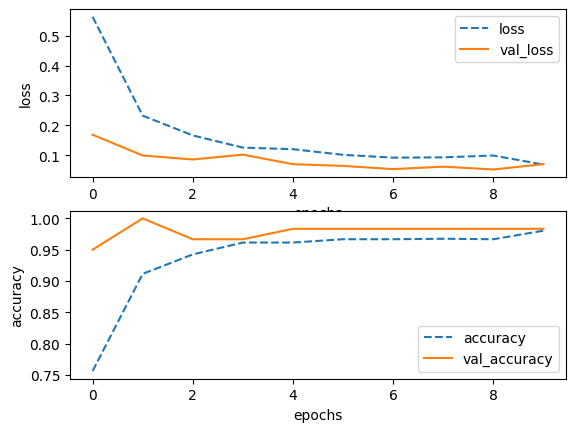

In [27]:
plot_metrics(enet_model_history)

In [28]:
# test the model and print test loss and accuracy
enet_test = enet_model.evaluate(test_ds)
enet_accuracy = enet_test[1]*100
print("Test Accuracy: ",enet_accuracy,"%")
print("Test Loss: ",enet_test[0])

5/5 [==============================] - 1s 189ms/step - loss: 0.2325 - accuracy: 0.9267
Test Accuracy:  92.66666769981384 %
Test Loss:  0.2325415015220642


# Plot the Results
Now at last we will plot and compare the results that we have got from the different models.

In [56]:
# dataframe of models and their accuracies
result_df = pd.DataFrame({
    'model':['ANN','CNN','MobilenetV2','EfficientnetV2'],
    'accuracy' :[ann_accuracy,cnn_accuracy,mobilenet_accuracy,enet_accuracy]
})
# show the dataframe
result_df

,model,accuracy
0,ANN,51.999998
1,CNN,41.999999
2,MobilenetV2,94.000000
3,EfficientnetV2,92.666668


<Axes: xlabel='model'>

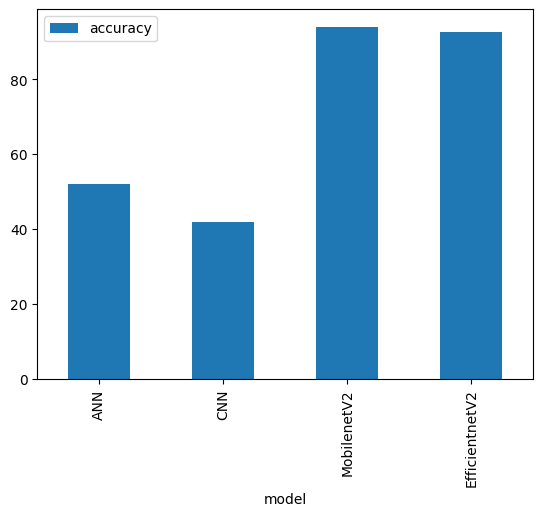

In [57]:
# plot the model vs accuracy graph
result_df.plot.bar(x='model',y='accuracy')